Regresion
https://drive.google.com/file/d/1PDYKuc0Ly7iBjG81voDPiVHmDY0o0Zmw/view?usp=sharing


El dataset de startups contiene variables como gastos en
investigación y desarrollo (I+D), costos administrativos, gastos en
marketing, ubicación geográfica y beneficios netos.
Este tipo de datos es esencial para entender el rendimiento
financiero y operativo de una startup, lo cual es crítico para la
toma de decisiones tanto para los inversionistas como para la
administración de la empresa.

a. Análisis Exploratorio de Datos (EDA) ¿Qué conclusiones
puede sacar con respecto a las distribuciones de las
variables numéricas y las relaciones entre ellas?

In [184]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
pd.set_option('display.float_format', lambda x: '%.3f' % x)


Importo los datos y ewmpiezo con el eda

In [185]:
df = pd.read_csv("emprendimientos.csv")

In [186]:
emprendimientos = df.copy()

In [187]:
emprendimientos.shape

(70, 11)

Los datos tienen 70 filas y 11 columnas

In [188]:
emprendimientos.head()

,Unnamed: 0,RnD_Expenditure,Admin_Costs,Marketing_Expenditure,Location,Net_Profit,Industry_Sector,Profit,Employee_Count,Investment_Round,Operational_Cost
0,0,165349.200,136897.800,471784.100,New York,192261.830,Energy,227095.722,289,Series A,608681.900
1,1,162597.700,151377.590,443898.530,California,191792.060,Tech,224711.757,217,Series B,595276.120
2,2,153441.510,101145.550,407934.540,Florida,191050.390,Finance,222717.430,407,Series C,509080.090
3,3,144372.410,118671.850,383199.620,New York,182901.990,Finance,214017.365,383,Series A,501871.470
4,4,142107.340,91391.770,366168.420,Florida,166187.940,Finance,196476.966,351,Series B,457560.190


In [189]:
emprendimientos.tail()

,Unnamed: 0,RnD_Expenditure,Admin_Costs,Marketing_Expenditure,Location,Net_Profit,Industry_Sector,Profit,Employee_Count,Investment_Round,Operational_Cost
65,65,134093.502,47327.345,26681.273,California,105423.930,Tech,120378.804,335,Seed,74008.617
66,66,83460.960,102975.139,287058.803,New York,-21313.507,Healthcare,-14885.847,430,Seed,390033.942
67,67,111737.966,125193.851,73364.287,New York,187372.315,Finance,197551.193,367,Seed,198558.138
68,68,28077.388,2743.242,294652.768,New York,62478.033,Healthcare,64877.720,258,Seed,297396.010
69,69,39620.298,112521.647,349879.180,Florida,94597.404,Healthcare,98661.736,31,Seed,462400.827


Tipos de datos

In [190]:
emprendimientos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             70 non-null     int64  
 1   RnD_Expenditure        70 non-null     float64
 2   Admin_Costs            70 non-null     float64
 3   Marketing_Expenditure  70 non-null     float64
 4   Location               70 non-null     object 
 5   Net_Profit             70 non-null     float64
 6   Industry_Sector        70 non-null     object 
 7   Profit                 70 non-null     float64
 8   Employee_Count         70 non-null     int64  
 9   Investment_Round       70 non-null     object 
 10  Operational_Cost       70 non-null     float64
dtypes: float64(6), int64(2), object(3)
memory usage: 6.1+ KB


Borro la columna de indice para que no me quede doble indice

In [191]:
emprendimientos = emprendimientos.drop(columns=['Unnamed: 0'])


In [192]:
from funciones_importantes import validate_columns

Con validate columns puedo ver las columnas con sus nombres, la cantidad de valores unicos por columna (y cuales son), la cantidad y % de nulos y una muestra de valores de esa columna

In [193]:
validate_columns(emprendimientos)

,Column,Unique_Values,Num_Unique_Values,Num_Null_Values,Sample_Unique_Values,%_null
0,RnD_Expenditure,"[165349.2, 162597.7, 153441.51, 144372.41, 142...",69,0,"[29351.17816342261, 91749.16, 153441.51, 20229...",0.000
1,Admin_Costs,"[136897.8, 151377.59, 101145.55, 118671.85, 91...",70,0,"[115816.21, 116983.8, 112521.64724174512, 1530...",0.000
2,Marketing_Expenditure,"[471784.1, 443898.53, 407934.54, 383199.62, 36...",68,0,"[298664.47, 28334.72, 407934.54, 107138.38, 30...",0.000
3,Location,"[New York, California, Florida]",3,0,"[New York, Florida, Florida]",0.000
4,Net_Profit,"[192261.83, 191792.06, 191050.39, 182901.99, 1...",70,0,"[192261.83, 182901.99, 57022.79746782372, 1569...",0.000
5,Industry_Sector,"[Energy, Tech, Finance, Healthcare, Retail]",5,0,"[Finance, Retail, Healthcare, Tech, Energy]",0.000
6,Profit,"[227095.7223459677, 224711.75720836723, 222717...",70,0,"[131171.81218416593, 64877.71998320965, 126015...",0.000
7,Employee_Count,"[289, 217, 407, 383, 351, 58, 315, 79, 179, 17...",68,0,"[393, 319, 460, 428, 393]",0.000
8,Investment_Round,"[Series A, Series B, Series C, IPO, Seed]",5,0,"[Seed, Seed, Series B, Series C, Seed]",0.000
9,Operational_Cost,"[608681.8999999999, 595276.12, 509080.09, 5018...",70,0,"[251213.03, 460332.24, 152665.2916717721, 3771...",0.000


In [194]:
emprendimientos.describe() #medidas estdisticas simples para cada columna

,RnD_Expenditure,Admin_Costs,Marketing_Expenditure,Net_Profit,Profit,Employee_Count,Operational_Cost
count,70.000,70.000,70.000,70.000,70.000,70.000,70.000
mean,73645.768,110300.347,212932.971,108074.579,120746.498,264.500,323233.318
std,46643.654,39611.403,129284.203,49144.596,55478.854,141.088,135322.612
min,0.000,2743.242,0.000,-21313.507,-14885.847,10.000,24435.504
25%,37578.659,96962.557,120540.355,78931.372,83428.580,144.750,219525.129
50%,73051.080,118608.950,212716.240,106661.196,119810.725,262.000,322937.665
75%,106300.780,136547.117,302423.768,140623.042,160098.271,393.000,413510.677
max,175623.487,182645.560,494430.544,192261.830,227095.722,497.000,614542.230


No hay valores nulos, por los cual sigo con el análisis

Sigo haciendo un boxplot para las columnas para verificar si hay outliers y luego analizo si tienen sentido o deben ser eliminados de nuestros datos para un mejor analisis 

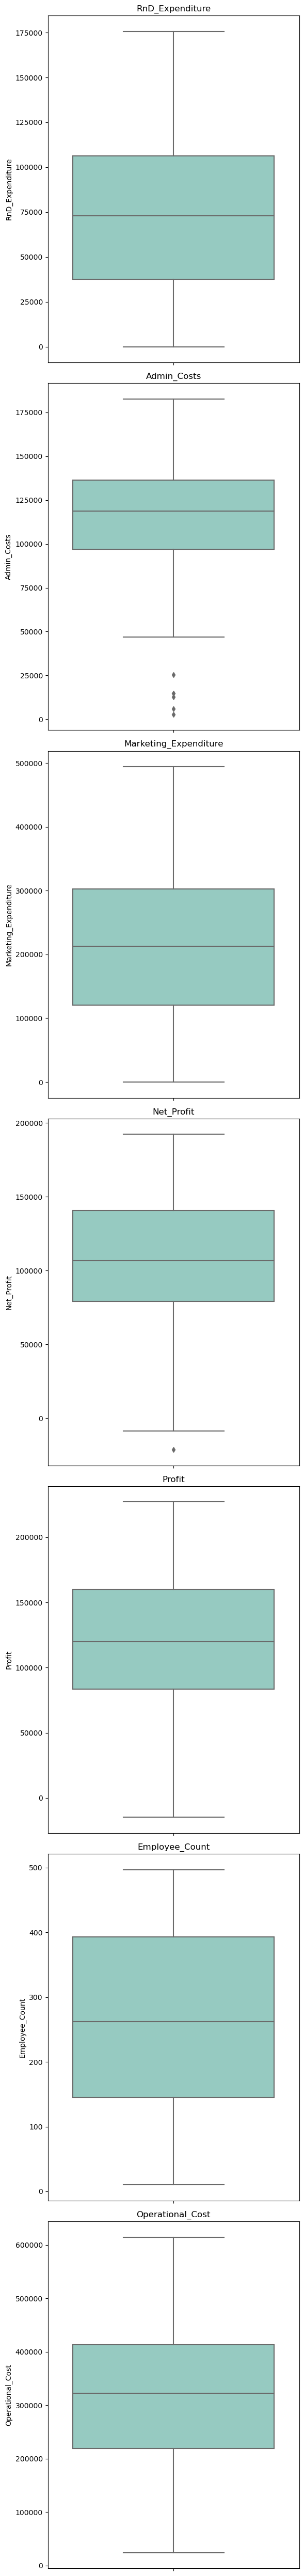

In [195]:
from funciones_importantes import grafico_out_boxplot
grafico_out_boxplot(emprendimientos)

Ahora hago histogramas de los valores de cada columna para ver si debo estandarizar mis datos o los puedo usar así, como veo que todas las variables tienen forma de campana(normal) no hace falta y puedo avanzar con el modelo

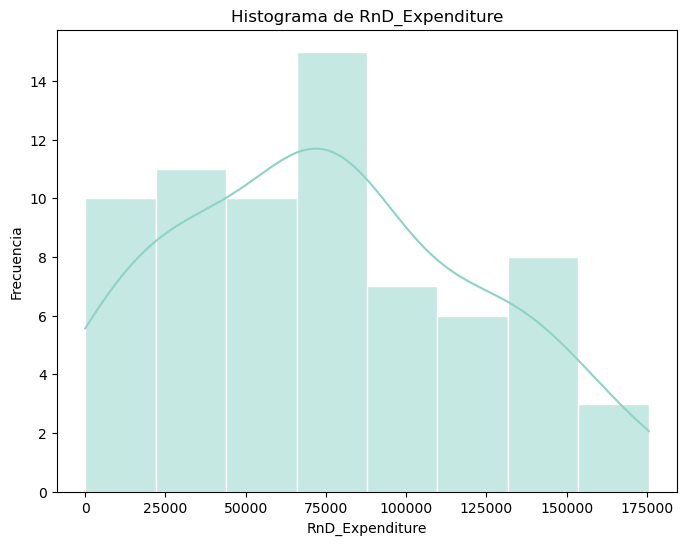

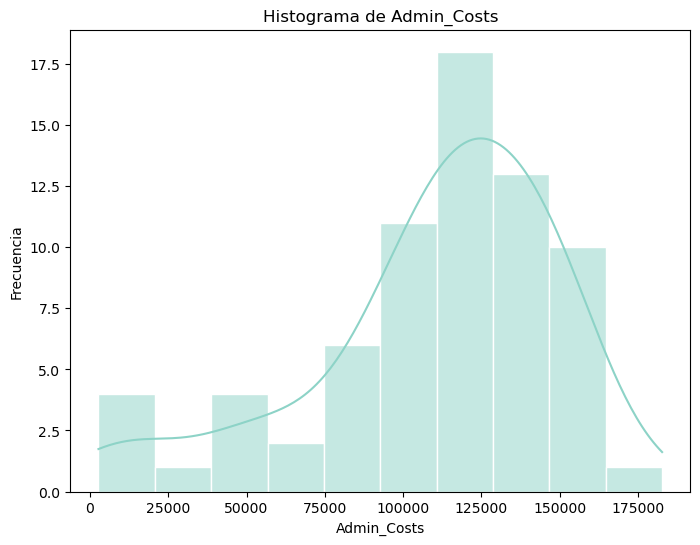

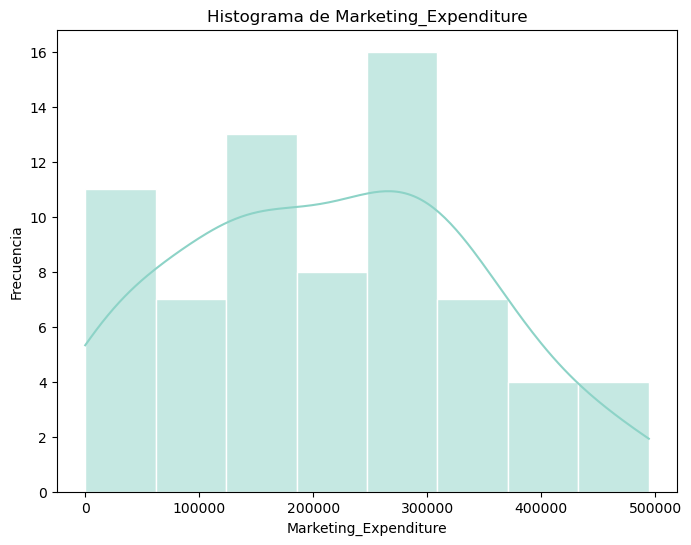

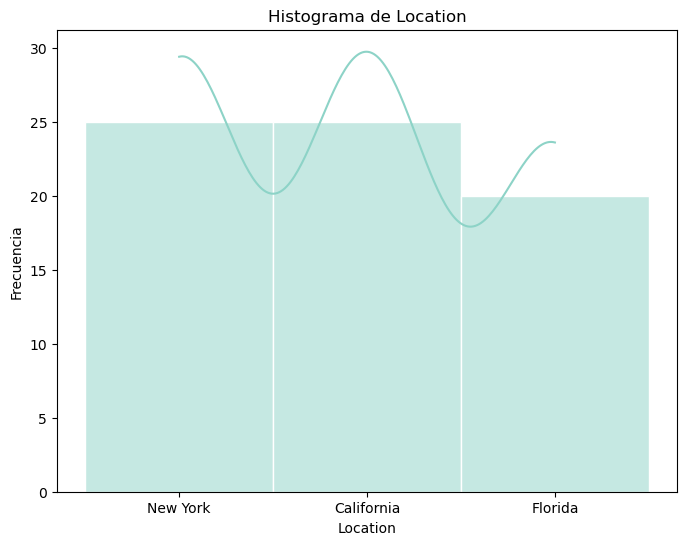

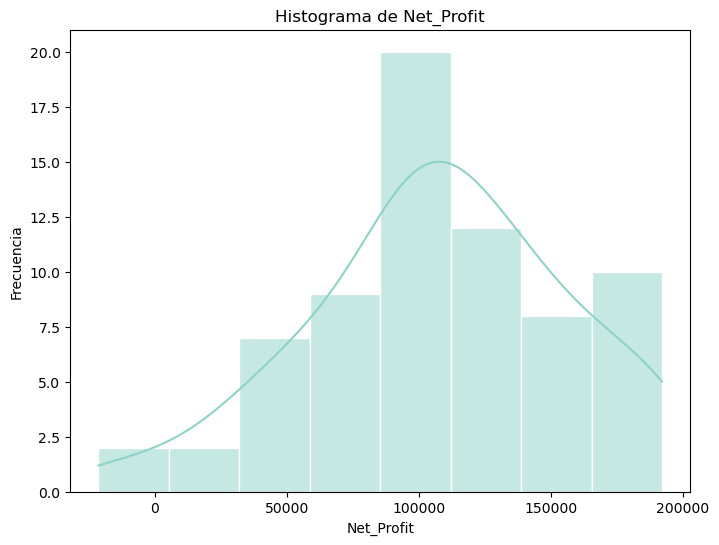

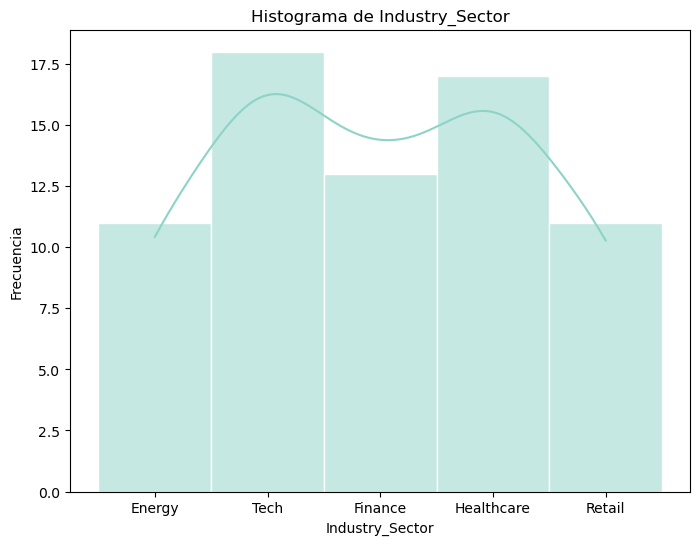

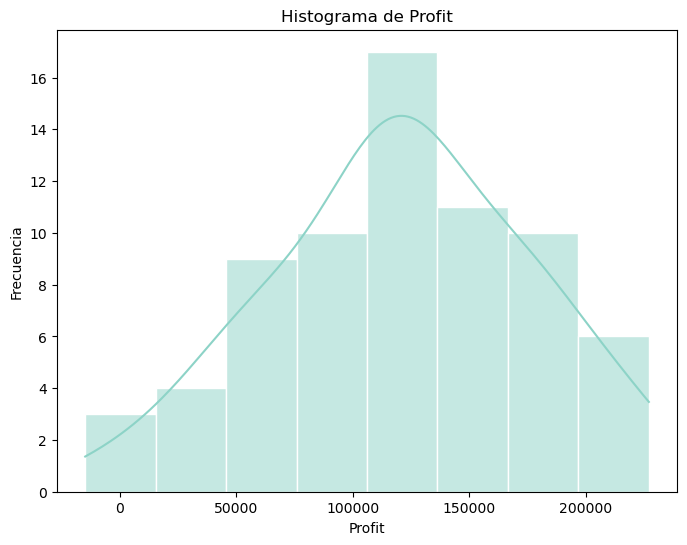

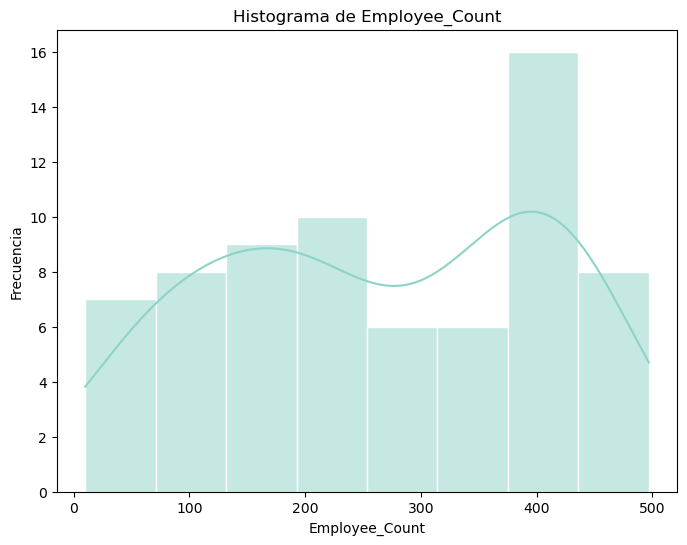

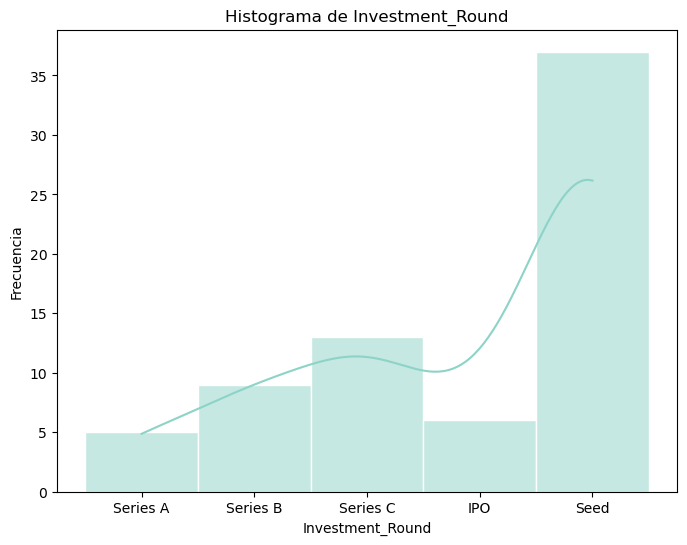

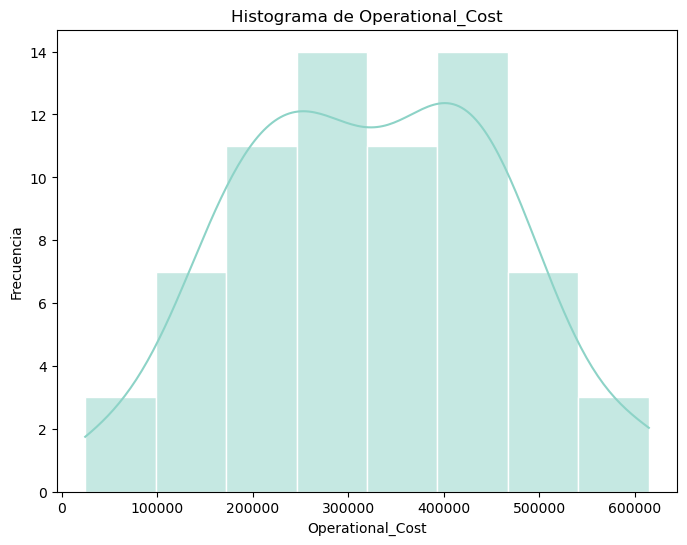

In [196]:
from funciones_importantes import plot_histograms

plot_histograms(emprendimientos)


In [197]:
emprendimientos.describe()

,RnD_Expenditure,Admin_Costs,Marketing_Expenditure,Net_Profit,Profit,Employee_Count,Operational_Cost
count,70.000,70.000,70.000,70.000,70.000,70.000,70.000
mean,73645.768,110300.347,212932.971,108074.579,120746.498,264.500,323233.318
std,46643.654,39611.403,129284.203,49144.596,55478.854,141.088,135322.612
min,0.000,2743.242,0.000,-21313.507,-14885.847,10.000,24435.504
25%,37578.659,96962.557,120540.355,78931.372,83428.580,144.750,219525.129
50%,73051.080,118608.950,212716.240,106661.196,119810.725,262.000,322937.665
75%,106300.780,136547.117,302423.768,140623.042,160098.271,393.000,413510.677
max,175623.487,182645.560,494430.544,192261.830,227095.722,497.000,614542.230


Analizo los valores outliefs en Admin_Costs y Net_Profit para ver si tengo que filtrar mi data 

In [198]:
emprendimientos['adm_cost_menor50000']= emprendimientos['Admin_Costs']<50000
admin = emprendimientos.groupby('adm_cost_menor50000').agg(menor50000=('adm_cost_menor50000','count'),net_profit=('Net_Profit', 'sum'))
admin


,menor50000,net_profit
adm_cost_menor50000,,
False,63,6783479.241
True,7,781741.265


como son pocas, y aparte los gastos administrativos pueden ser menores a 50000 tranquilamente, no los voy a sacar de mi modelo, ya que es algo que me va a interesar que esté para luego predecir

In [199]:
cinco_minimos_indices = emprendimientos['Net_Profit'].nsmallest(5).index
cinco_minimos_filas = emprendimientos.loc[cinco_minimos_indices]
cinco_minimos_filas


,RnD_Expenditure,Admin_Costs,Marketing_Expenditure,Location,Net_Profit,Industry_Sector,Profit,Employee_Count,Investment_Round,Operational_Cost,adm_cost_menor50000
66,83460.960,102975.139,287058.803,New York,-21313.507,Healthcare,-14885.847,430,Seed,390033.942,False
51,144064.899,145239.236,374082.827,California,-8661.451,Retail,5768.589,151,Seed,519322.064,False
49,0.000,116983.800,45173.060,California,14681.400,Energy,14468.660,158,Seed,162156.860,False
60,83838.903,14752.025,9683.479,California,17481.973,Energy,26885.267,34,Seed,24435.504,True
48,542.050,51743.150,0.000,New York,35673.410,Healthcare,34167.922,237,Series A,51743.150,False


Me traje los minimos valores de net_profit para ver el dato outlier, pero como puede ser tranquilamente un valor normal y real ese numero negativo, ya que el beneficio de una empresa puede ser negativo (perdida)

In [200]:
emprendimientos.drop('adm_cost_menor50000',axis=1)

,RnD_Expenditure,Admin_Costs,Marketing_Expenditure,Location,Net_Profit,Industry_Sector,Profit,Employee_Count,Investment_Round,Operational_Cost
0,165349.200,136897.800,471784.100,New York,192261.830,Energy,227095.722,289,Series A,608681.900
1,162597.700,151377.590,443898.530,California,191792.060,Tech,224711.757,217,Series B,595276.120
2,153441.510,101145.550,407934.540,Florida,191050.390,Finance,222717.430,407,Series C,509080.090
3,144372.410,118671.850,383199.620,New York,182901.990,Finance,214017.365,383,Series A,501871.470
4,142107.340,91391.770,366168.420,Florida,166187.940,Finance,196476.966,351,Series B,457560.190
...,...,...,...,...,...,...,...,...,...,...
65,134093.502,47327.345,26681.273,California,105423.930,Tech,120378.804,335,Seed,74008.617
66,83460.960,102975.139,287058.803,New York,-21313.507,Healthcare,-14885.847,430,Seed,390033.942
67,111737.966,125193.851,73364.287,New York,187372.315,Finance,197551.193,367,Seed,198558.138
68,28077.388,2743.242,294652.768,New York,62478.033,Healthcare,64877.720,258,Seed,297396.010


Hago un heatmap para ver relacion entre columnas

<Axes: >

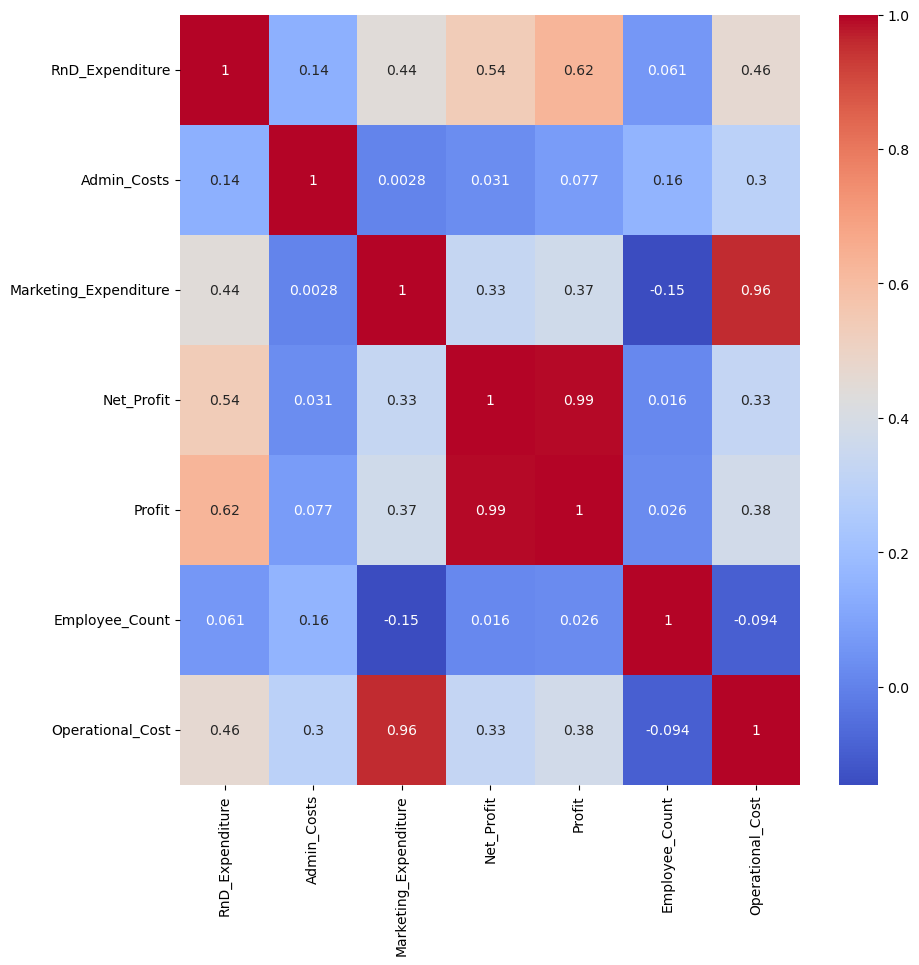

In [201]:
numeric_columns = emprendimientos.select_dtypes(include=[np.number])  # Selecciona solo las columnas numéricas

plt.figure(figsize = (10, 10))

sns.heatmap(
    numeric_columns.corr(), 
    cmap = 'coolwarm', 
    annot = True, 
    annot_kws = {"size": 10})

saco la conclusion que la columna de net_profit y profit son colineanes (el valor de una depende de la otra, entonces la correlacion entre ellas es muy alta) por eso no poongo la variable profit para mi modelo

In [202]:
emprendimientos.columns

Index(['RnD_Expenditure', 'Admin_Costs', 'Marketing_Expenditure', 'Location',
       'Net_Profit', 'Industry_Sector', 'Profit', 'Employee_Count',
       'Investment_Round', 'Operational_Cost', 'adm_cost_menor50000'],
      dtype='object')

Me pregunto si explica mejor el net profit un modelo con las variables numericas, categoricas o ambas juntas, por eso analizo y comparo esos modelos entre si y me quedo con el que mayor R cuadrado tenga ya que es mas explicativo 

MODELO CON TODAS LAS VARIABLES NUMERICAS

In [203]:
features = ['RnD_Expenditure', 'Admin_Costs', 'Marketing_Expenditure', 'Employee_Count','Operational_Cost']
formula = "Net_Profit~ " + ' + '.join(features)
formula

'Net_Profit~ RnD_Expenditure + Admin_Costs + Marketing_Expenditure + Employee_Count + Operational_Cost'

In [204]:
modelnumericas = smf.ols(formula,data=emprendimientos)
modelnumericas=modelnumericas.fit()
modelnumericas.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Net_Profit   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     6.985
Date:                Thu, 09 Nov 2023   Prob (F-statistic):           9.67e-05
Time:                        23:26:59   Log-Likelihood:                -842.48
No. Observations:                  70   AIC:                             1695.
Df Residuals:                      65   BIC:                             1706.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              6.535e+04   1.94e+04      3.369      0.001    2.66e+04    1.04e+05
RnD_Expenditure           0.5156      0.124      4.149      0.000       0.267       0.764
Admin_Costs              -0.0497      0.088     -0.562      0.576      -0.226       0.127
Marketing_Expenditure     0.0473      0.052      0.909      0.367      -0.057       0.151
Employee_Count            3.4692     37.252      0.093      0.926     -70.929      77.868
Operational_Cost         -0.0023      0.047     -0.050      0.960      -0.096       0.091
==============================================================================
Omnibus:                       29.441   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.449
Skew:                          -1.322   Prob(JB):                     1.85e-16
Kurtosis:                       7.225   Cond. No.                     1.25e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.91e-20. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Como el P value tiene que ser menor a 0.05 solo una variable es estadisticamente significativa para explicar el modelo es RnD_expenditure 

El coeficiente mas alto es Employee_Count, al sumar un empleado el beneficio neto sube en un 3,47, pero sin embargo el P-value es muy alto y no se considera estadisticamente significante para nuestro analisis. El siguiente coeficiente mas alto es el de RnDexpenditure que significa que por cada punto aumenta un 0.5 el beneficio neto y su p-value es 0 por lo cual es estadisticamente significativo y teniendo este modelo es la variable que mas nos ayuda a predecir.
El r-cuadrado de este modelo es 0.3 lo cual es bajo, pero lo voy  a comparar con los siguientes modelos 

In [205]:
print(f" El modelo de solo variables numericas dio de r-cuadrado {modelnumericas.rsquared}")

 El modelo de solo variables numericas dio de r-cuadrado 0.30061048463937246


MODELO CON TODAS LAS VARIABLES CATEGORICAS

In [206]:
features = ['C(Location)', 'C(Industry_Sector)','C(Investment_Round)']
formula = "Net_Profit~ " + ' + '.join(features)
formula

'Net_Profit~ C(Location) + C(Industry_Sector) + C(Investment_Round)'

In [207]:
modelcategoricas = smf.ols(formula,data=emprendimientos)
modelcategoricas=modelcategoricas.fit()
modelcategoricas.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Net_Profit   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     1.205
Date:                Thu, 09 Nov 2023   Prob (F-statistic):              0.307
Time:                        23:26:59   Log-Likelihood:                -848.49
No. Observations:                  70   AIC:                             1719.
Df Residuals:                      59   BIC:                             1744.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         7.984e+04   2.48e+04      3.222      0.002    3.03e+04    1.29e+05
C(Location)[T.Florida]            5942.5834   1.64e+04      0.362      0.719   -2.69e+04    3.88e+04
C(Location)[T.New York]           6784.2221   1.52e+04      0.445      0.658   -2.37e+04    3.73e+04
C(Industry_Sector)[T.Finance]     3.292e+04   2.07e+04      1.588      0.118   -8572.215    7.44e+04
C(Industry_Sector)[T.Healthcare] -6291.8788   1.89e+04     -0.332      0.741   -4.42e+04    3.16e+04
C(Industry_Sector)[T.Retail]      6532.8956   2.13e+04      0.306      0.761   -3.62e+04    4.92e+04
C(Industry_Sector)[T.Tech]        2.241e+04   1.89e+04      1.187      0.240   -1.54e+04    6.02e+04
C(Investment_Round)[T.Seed]       4045.9862   2.35e+04      0.172      0.864    -4.3e+04    5.11e+04
C(Investment_Round)[T.Series A]   3.234e+04    3.3e+04      0.979      0.332   -3.38e+04    9.85e+04
C(Investment_Round)[T.Series B]   3.529e+04   2.72e+04      1.296      0.200   -1.92e+04    8.98e+04
C(Investment_Round)[T.Series C]   2.021e+04   2.68e+04      0.753      0.454   -3.35e+04    7.39e+04
==============================================================================
Omnibus:                        3.067   Durbin-Watson:                   1.480
Prob(Omnibus):                  0.216   Jarque-Bera (JB):                2.008
Skew:                          -0.203   Prob(JB):                        0.366
Kurtosis:                       2.276   Cond. No.                         12.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [208]:
print(f" El modelo de solo variables categoricas dio de r-cuadrado {modelcategoricas.rsquared}")

 El modelo de solo variables categoricas dio de r-cuadrado 0.1696255813880836


Como el P value tiene que ser menor a 0.05 ninguna variable es estadisticamente significativa para explicar el modelo, pero aun asi llaman la antencion los coeficientes de las categorias de Locacion (florida y ny) y si la industria del sector es healthcare o retail , de igual manera si la ronda de inversion es semilla.
El r-cuadrado de este modelo es de 0.170 por lo cual seguimos prefiriendo para predecir el profit el modelo que solo contiene variables numericas

MODELO CON TODAS LAS VARIABLES (NUMERICAS Y CATEGORICAS)

In [209]:
features = ['RnD_Expenditure', 'Admin_Costs', 'Marketing_Expenditure', 'C(Location)', 'C(Industry_Sector)', 'Employee_Count','C(Investment_Round)','Operational_Cost']


In [210]:
formula = "Net_Profit~ " + ' + '.join(features)
formula

'Net_Profit~ RnD_Expenditure + Admin_Costs + Marketing_Expenditure + C(Location) + C(Industry_Sector) + Employee_Count + C(Investment_Round) + Operational_Cost'

In [211]:
modeltodas = smf.ols(formula,data=emprendimientos)
modeltodas=modeltodas.fit()
modeltodas.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Net_Profit   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     2.531
Date:                Thu, 09 Nov 2023   Prob (F-statistic):            0.00729
Time:                        23:26:59   Log-Likelihood:                -837.59
No. Observations:                  70   AIC:                             1705.
Df Residuals:                      55   BIC:                             1739.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         6.354e+04   2.76e+04      2.299      0.025    8157.387    1.19e+05
C(Location)[T.Florida]            2378.7027   1.47e+04      0.162      0.872   -2.71e+04    3.19e+04
C(Location)[T.New York]           3426.4389   1.43e+04      0.239      0.812   -2.53e+04    3.21e+04
C(Industry_Sector)[T.Finance]     1.821e+04   1.91e+04      0.955      0.344      -2e+04    5.64e+04
C(Industry_Sector)[T.Healthcare]  -1.52e+04   1.75e+04     -0.869      0.389   -5.02e+04    1.99e+04
C(Industry_Sector)[T.Retail]     -7601.8150   1.94e+04     -0.392      0.697   -4.65e+04    3.13e+04
C(Industry_Sector)[T.Tech]        1.303e+04   1.72e+04      0.756      0.453   -2.15e+04    4.76e+04
C(Investment_Round)[T.Seed]       2287.6541   2.15e+04      0.107      0.915   -4.07e+04    4.53e+04
C(Investment_Round)[T.Series A]   1.813e+04   3.07e+04      0.591      0.557   -4.33e+04    7.96e+04
C(Investment_Round)[T.Series B]   2.017e+04   2.57e+04      0.786      0.435   -3.13e+04    7.16e+04
C(Investment_Round)[T.Series C]   1.906e+04   2.47e+04      0.773      0.443   -3.04e+04    6.85e+04
RnD_Expenditure                      0.4313      0.132      3.274      0.002       0.167       0.695
Admin_Costs                         -0.1105      0.094     -1.172      0.246      -0.299       0.078
Marketing_Expenditure                0.0845      0.056      1.510      0.137      -0.028       0.197
Employee_Count                      11.3353     42.243      0.268      0.789     -73.322      95.993
Operational_Cost                    -0.0260      0.049     -0.527      0.600      -0.125       0.073
==============================================================================
Omnibus:                       14.446   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               22.691
Skew:                          -0.754   Prob(JB):                     1.18e-05
Kurtosis:                       5.346   Cond. No.                     2.20e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.89e-20. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [212]:
print(f" El modelo de todas las variables  dio de r-cuadrado {modeltodas.rsquared}")

 El modelo de todas las variables  dio de r-cuadrado 0.39182234871025357


El modelo que mejor r-cuadrado tiene es en el que usamos tanto las variables categoricas como las numericas 

Podemos observar que el mejor modelo (y le que elegi para hacer el analisis en los siguientes puntos) es el tercero (incluye todas las variables "modeltodas") y nos explica cuanto de la variable dependiente es explicado por el modelo 

Solo es significativo para el modelo la variable de RnD_expenditure ya que tiene un p value menor a 0.05 y un valor de t grande en comparacion a los demas y se vuelve estadisticamente significativa. De iual manera, este modelo (que contiene las variables numéricas y las categóricas, es el mejor comparado conlos anteriores ya que tiene mayor R cuadrado

Como el modelo que toma tanto las variables categoricas ocmo numericas es el que tiene mayor r cuadrado, es el modelo que voy a preferir para hacer el predict del beneficio neto

In [213]:
#Creo una columna en el df emprendimientos que sea el predict

In [214]:
emprendimientos['Predict'] = modeltodas.predict(emprendimientos)
emprendimientos.sample()


,RnD_Expenditure,Admin_Costs,Marketing_Expenditure,Location,Net_Profit,Industry_Sector,Profit,Employee_Count,Investment_Round,Operational_Cost,adm_cost_menor50000,Predict
10,101913.080,110594.110,229160.950,Florida,146121.950,Tech,166648.610,458,Series C,339755.060,False,145451.667


In [215]:
emprendimientos_real_predict= emprendimientos[['Net_Profit','Predict']]
emprendimientos_real_predict

,Net_Profit,Predict
0,192261.830,168573.107
1,191792.060,174610.102
2,191050.390,184019.172
3,182901.990,176114.411
4,166187.940,178498.331
...,...,...
65,105423.930,135590.379
66,-21313.507,97644.680
67,187372.315,127013.119
68,62478.033,85936.480


In [216]:
emprendimientos_real_predict['error']= emprendimientos['Predict'] -emprendimientos_real_predict['Net_Profit']
emprendimientos_real_predict['error_cuad']= emprendimientos_real_predict['error']**2


C:\Users\chiar\AppData\Local\Temp\ipykernel_26396\1471797562.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emprendimientos_real_predict['error']= emprendimientos['Predict'] -emprendimientos_real_predict['Net_Profit']
C:\Users\chiar\AppData\Local\Temp\ipykernel_26396\1471797562.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emprendimientos_real_predict['error_cuad']= emprendimientos_real_predict['error']**2


Grafico los residuos que me generó el modelo para ver que dispersion tienen y si tienen alguna tendencia

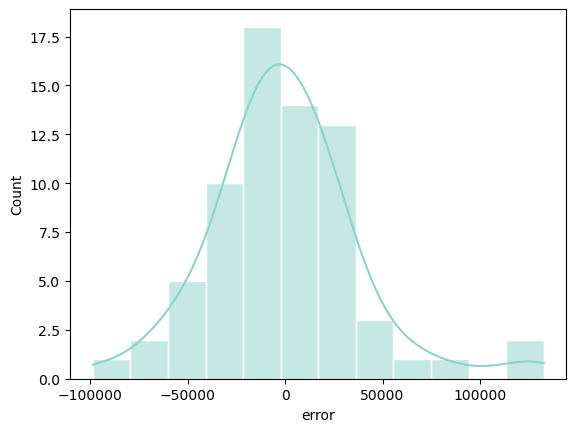

In [217]:
sns.histplot(emprendimientos_real_predict['error'], kde=True, edgecolor='w');

Se puede observar que los errores se distribuyen practicamente de forma de campana y no tienen tendencia a ningun extremo

In [218]:
#error medio
emprendimientos_real_predict['error'].mean()

3.445515176281333e-07

In [219]:
format(emprendimientos_real_predict['error'].mean(), '.15f')

'0.000000344551518'

El error medio tiende a cero, perfecto!! (esto sucede porque los errores se cancelan entre si los positivos y negativos)

In [220]:
#error cuad medio
emprendimientos_real_predict['error_cuad'].mean()

1447881607.1500747

Beneficio por industria

In [221]:
industrias = emprendimientos.groupby('Industry_Sector').agg(net_profit=('Net_Profit', 'sum'), num_empresas =('Industry_Sector', 'count'), net_profit_var=('Net_Profit','var'))
industrias['net_profit_%'] = industrias['net_profit'] / industrias['net_profit'].sum() * 100
industrias['net_profit_prom'] = industrias['net_profit'] / industrias['num_empresas']
industrias

,net_profit,num_empresas,net_profit_var,net_profit_%,net_profit_prom
Industry_Sector,,,,,
Energy,1050406.509,11,3369658461.332,13.885,95491.501
Finance,1686325.195,13,1672921964.538,22.290,129717.323
Healthcare,1535783.027,17,2099984685.138,20.301,90340.178
Retail,1136504.697,11,2884488823.002,15.023,103318.609
Tech,2156201.077,18,2031493509.650,28.501,119788.949


La industria con mayor beneficio neto es la Tech, pero tambien es la industria con mayor numero de empresas, al calcular el promedio de beneficio neto por insdustria notamos que el sector con mayor promedio fue el de finanzas, seguido por Tech

Beneficio por serie


In [222]:
series = emprendimientos.groupby('Investment_Round').agg(net_profit=('Net_Profit', 'sum'), num_series =('Investment_Round', 'count'),net_profit_var=('Net_Profit','var'))
series['net_profit_%'] = series['net_profit'] / series['net_profit'].sum() * 100
series['net_profit_prom'] = series['net_profit'] / series['num_series']
series

,net_profit,num_series,net_profit_var,net_profit_%,net_profit_prom
Investment_Round,,,,,
IPO,613529.440,6,949409830.145,8.110,102254.907
Seed,3611996.385,37,2925392334.825,47.745,97621.524
Series A,637587.330,5,4974836944.032,8.428,127517.466
Series B,1193707.460,9,1135091193.702,15.779,132634.162
Series C,1508399.890,13,1268273925.941,19.939,116030.761


Podemos observar que la ronda de inversion de Seed es la que genera mayor beneficio neto total, pero tambienes la que mayor cantidad de empresas tiene (37). Al calcular el promedio del beneficio neto entre las industrias, podemos ver que la que tiene mayor promedio de benficio neto es la Serie B

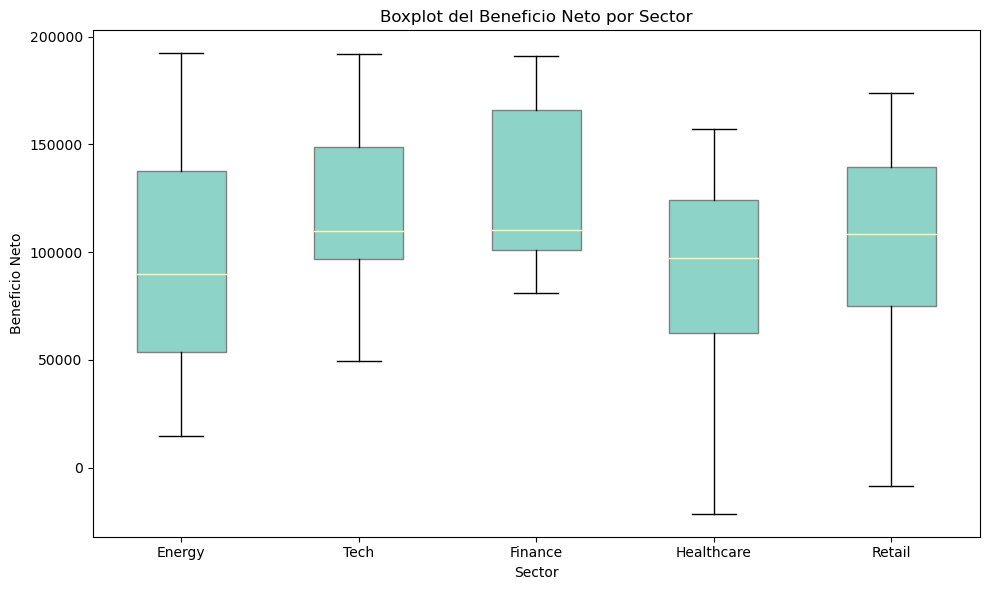

In [223]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Asegúrate de tener cargados tus datos en 'emprendimientos'

# Filtrar y agrupar los datos de beneficio neto por sector
data = [emprendimientos[emprendimientos['Industry_Sector'] == sector]['Net_Profit'] for sector in emprendimientos['Industry_Sector'].unique()]

# Elegir una paleta de colores de seaborn
sns.set_palette("Set3")

# Crear el gráfico de boxplot con colores de la paleta
plt.figure(figsize=(10, 6))
boxplot = plt.boxplot(data, labels=emprendimientos['Industry_Sector'].unique(), patch_artist=True)

# Asignar colores de la paleta a los boxplots
for box in boxplot['boxes']: # Color de fondo
    box.set_edgecolor("gray")  # Color del borde

plt.xlabel('Sector')
plt.ylabel('Beneficio Neto')
plt.title('Boxplot del Beneficio Neto por Sector')
plt.tight_layout()
plt.show()



Interpretacion del grafico:
Si quiero invertir sin mucho riesgo y que las ganancias sean altas, voy a invertir en el sector de finanzas, ya que tiene un techo de beneficio alto y el piso siguien siendo alto en comparacion con los demas sectores.
Donde menos voy a invertir es en el sector de HealthCare seguido de Retail ya que tienen el piso muy bajo (el sector de salud es menor a cero) y el beneficio maximo que puedo obtener no llega a igualarse con el de otras categorias con menor riesgo 

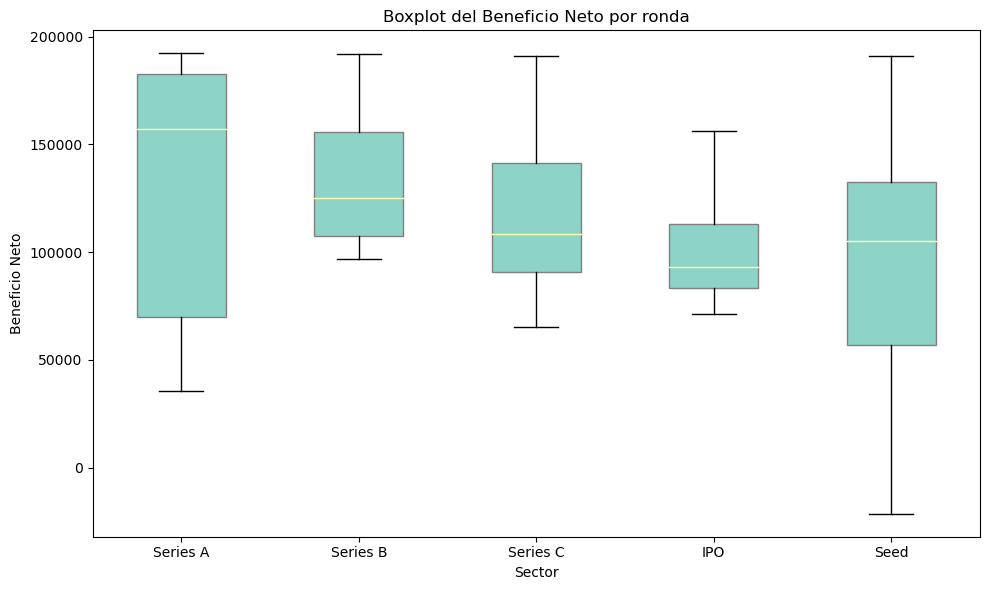

In [224]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Asegúrate de tener cargados tus datos en 'emprendimientos'

# Filtrar y agrupar los datos de beneficio neto por sector
data = [emprendimientos[emprendimientos['Investment_Round'] == sector]['Net_Profit'] for sector in emprendimientos['Investment_Round'].unique()]

# Elegir una paleta de colores de seaborn
sns.set_palette("Set3")

# Crear el gráfico de boxplot con colores de la paleta
plt.figure(figsize=(10, 6))
boxplot = plt.boxplot(data, labels=emprendimientos['Investment_Round'].unique(), patch_artist=True)

# Asignar colores de la paleta a los boxplots
for box in boxplot['boxes']: # Color de fondo
    box.set_edgecolor("gray")  # Color del borde

plt.xlabel('Sector')
plt.ylabel('Beneficio Neto')
plt.title('Boxplot del Beneficio Neto por ronda')
plt.tight_layout()
plt.show()

Podemos ver en el grafico de arriba los beneficios netos por ronda de inversion, el orden de la ronda es

Semillla - serie a - serie b - serie c - ipo

La conclusion que podemos ver es que las ipo al ser las mas desarrolladas y establecidas no tienen el beneficio maximo que se puede obtener (como el resto de las rondas si lo alcanzan) pero lo bueno de las ipo es que la diferencia entre lo uqe podes ganar/perder es muy poca y la amyoria de los datos estan agrupados todos juntos con poca variabilidad entre ellos. 
Otras como las semillas, seguidas por la serie A, al ser las primeras donde los emprendiminetos comienzan vemos que son las que tienen una mayor brecha de lo que pueden obtener como beneficio neto. 
A medida que la empresa va subiendo, la box se hace mas chica y los datos estan mas "estables" entre si y no presentan tantas diferencias. 